In [2]:
import pandas as pd

Кредитный скоринг. Работа с данными по ссылке: https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. 

In [29]:
Data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv', sep = ',')
Data.shape

(1000, 21)

In [31]:
Data['credit_risk'].value_counts()

credit_risk
good    700
bad     300
Name: count, dtype: int64

Определим, есть ли пропуски в данных. Разделим признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
Data.isna().sum()
NumericData = Data._get_numeric_data()
NumericData.head()

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


In [5]:
DataCat = Data.drop(['duration', 'amount', 'age'], axis = 1)
DataCat.shape

(1000, 18)

In [6]:
DataNominal = DataCat[['installment_rate', 'present_residence', 'number_credits', 'people_liable']]
DataNominal.head()

,installment_rate,present_residence,number_credits,people_liable
0,< 20,>= 7 yrs,1,0 to 2
1,25 <= ... < 35,1 <= ... < 4 yrs,2-3,3 or more
2,25 <= ... < 35,>= 7 yrs,1,0 to 2
3,20 <= ... < 25,1 <= ... < 4 yrs,2-3,3 or more
4,< 20,>= 7 yrs,2-3,0 to 2


In [7]:
DataCat = DataCat.drop(['installment_rate', 'present_residence', 'number_credits', 'people_liable'], axis = 1)
DataBin = Data[['telephone', 'foreign_worker', 'credit_risk']]
DataBin.head()

,telephone,foreign_worker,credit_risk
0,no,no,good
1,no,no,good
2,no,no,good
3,no,yes,good
4,no,yes,good


In [8]:
DataOrdinal = DataCat.drop(['telephone', 'foreign_worker', 'credit_risk'], axis = 1)
DataOrdinal.shape

(1000, 11)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
Data[['amount', 'purpose']].groupby('purpose').mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


Найдем, какой процент клиентов моложе 30 лет снимает жилье? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
younger30 = Data[Data['age'] < 30][['housing','age']]
older40 = Data[Data['age'] > 30][['housing', 'age']]

print(younger30.groupby('housing').count(), '\n', older40.groupby('housing').count(), '\n')

print(f'Среди клиентов моложе 30 лет {int(246/len(younger30)*100)}% снимают жилье.\n', 
      f'Cреди клиентов старже 40 лет - {int(435/len(older40)*100)}%'
)


          age
housing      
for free  113
own        10
rent      246 
           age
housing      
for free   63
own        93
rent      435 

Среди клиентов моложе 30 лет 66% снимают жилье.
 Cреди клиентов старже 40 лет - 73%


 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [11]:
df = Data[['foreign_worker', 'number_credits']]
df[df['foreign_worker'] == 'yes'].groupby('number_credits').count()
# у одного

,foreign_worker
number_credits,
1,25
2-3,11
4-5,1


In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, построим график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой.

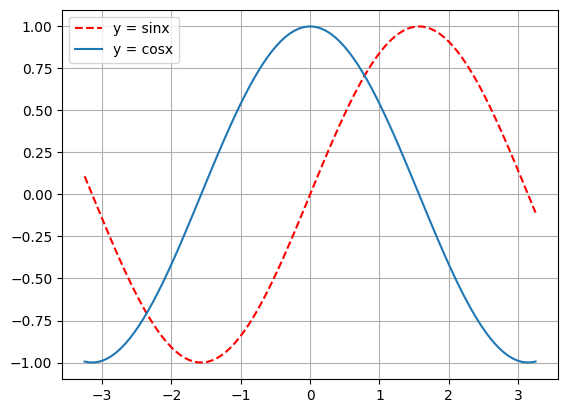

In [13]:
x = np.linspace(-3.25, 3.25, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.grid()
plt.plot(x,y1, 'r--')
plt.plot(x,y2)
plt.legend(['y = sinx', 'y = cosx'])

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Построим зеркальные горизонтальные гистограммы.

In [14]:
df = Data[['status','credit_risk']]
df_g = df[df['credit_risk'] == 'good'].groupby('status').count()
df_b = df[df['credit_risk'] == 'bad'].groupby('status').count()

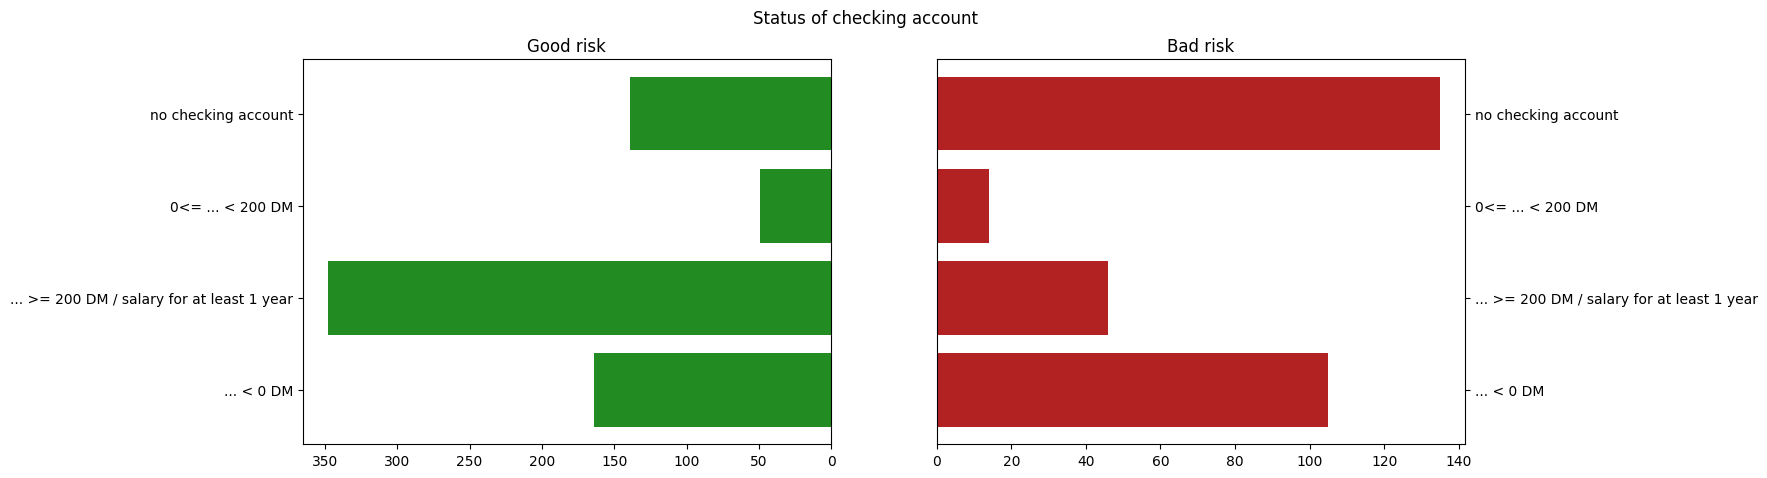

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
statuses = ['... < 0 DM',  '... >= 200 DM / salary for at least 1 year',
        '0<= ... < 200 DM','no checking account']
y_pos = np.arange(len(statuses))
ax[0].barh(y_pos, df_g['credit_risk'],align = 'center', color = 'forestgreen')
ax[0].set_yticks(y_pos, labels = statuses)
ax[0].invert_xaxis()
ax[0].set_title('Good risk')

ax[1].barh(y_pos, df_b['credit_risk'], align = 'center', color = 'firebrick')
ax[1].set_yticks(y_pos, labels = statuses)
ax[1].axes.yaxis.set_ticks_position("right")
ax[1].set_title('Bad risk')

fig.suptitle('Status of checking account')
plt.show()

In [16]:
import seaborn as sns

Построим гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn.

In [17]:
df_g = df_g.rename(columns = {'credit_risk': 'good'})
df_b = df_b.rename(columns = {'credit_risk': 'bad'})
g = list(pd.concat((df_g['good'], df_b['bad'])))
l = ['good','good','good','good','bad','bad','bad','bad']
df = pd.DataFrame({'status': ['... < 0 DM',  '... >= 200 DM / salary for at least 1 year',
        '0<= ... < 200 DM','no checking account', '... < 0 DM',  '... >= 200 DM / salary for at least 1 year',
        '0<= ... < 200 DM','no checking account'] , 
                  'credit_count': g, 
                  'credit_risk': l})

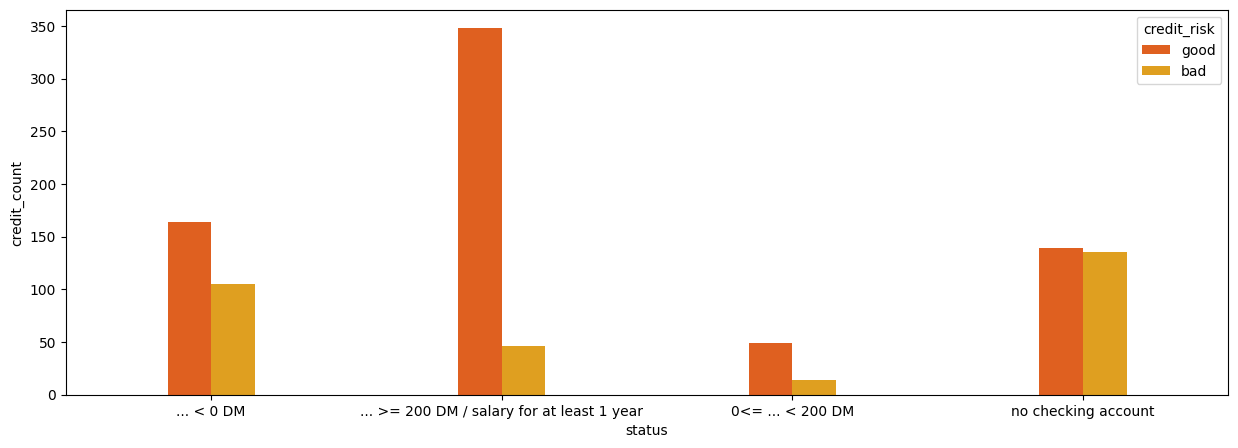

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(x = 'status', y = 'credit_count', hue = 'credit_risk', data = df, palette = 'autumn', width=0.3)
plt.show()

Для каждого размера сберегательного счёта оценим не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<Axes: xlabel='savings', ylabel='age'>

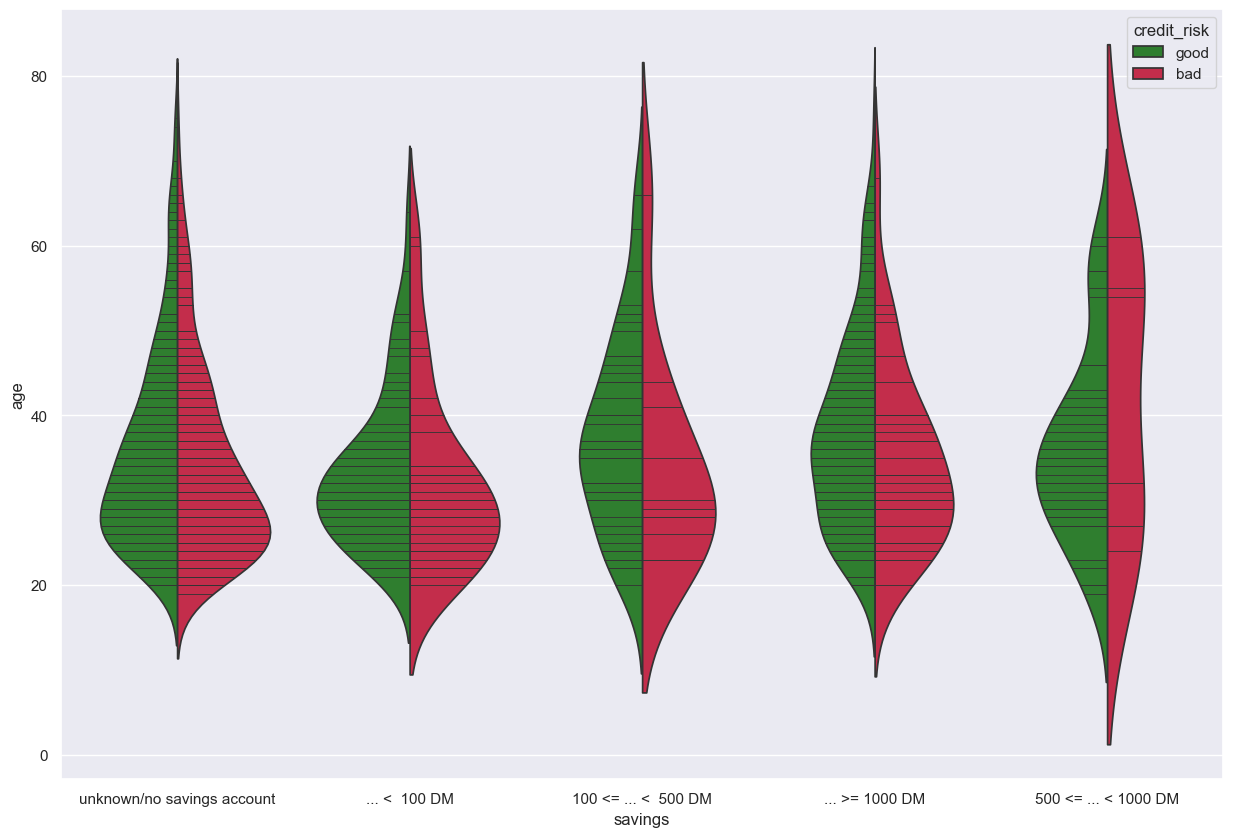

In [96]:
plt.figure(figsize = (15,10))
sns.violinplot(data = Data, x = 'savings', y = 'age', hue = 'credit_risk', 
               split=True, fill=True, inner="stick", palette={'good':'forestgreen', 'bad':'crimson'})

In [93]:
?sns.violinplot

Signature:
sns.violinplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    inner='box',
    split=False,
    width=0.8,
    dodge='auto',
    gap=0,
    linewidth=None,
    linecolor='auto',
    cut=2,
    gridsize=100,
    bw_method='scott',
    bw_adjust=1,
    density_norm='area',
    common_norm=False,
    hue_norm=None,
    formatter=None,
    log_scale=None,
    native_scale=False,
    legend='auto',
    scale=<deprecated>,
    scale_hue=<deprecated>,
    bw=<deprecated>,
    inner_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Draw a patch representing a KDE and add observations or box plot statistics.

A violin plot plays a similar role as a box-and-whisker plot. It shows the
distribution of data points after grouping by one (or more) variables.
Unlike a box plot, each violin is drawn using a kernel density estimate
of the underlying dist

Рассмотрим распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

(array([ 57., 182., 170., 105., 142.,  89.,  71.,  47.,  41.,  28.,  23.,
         17.,  18.,   4.,   6.]),
 array([19.        , 22.73333333, 26.46666667, 30.2       , 33.93333333,
        37.66666667, 41.4       , 45.13333333, 48.86666667, 52.6       ,
        56.33333333, 60.06666667, 63.8       , 67.53333333, 71.26666667,
        75.        ]),
 <BarContainer object of 15 artists>)

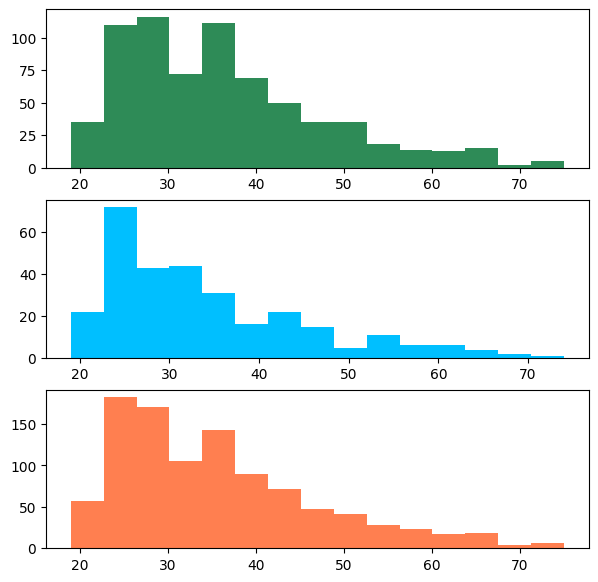

In [19]:
fig, ax = plt.subplots(3,1, figsize = (7,7))
df1 = Data[Data['credit_risk'] == 'good']
ax[0].hist(x = df1['age'], bins = 15, color = 'seagreen' )

df2 = Data[Data['credit_risk'] == 'bad']
ax[1].hist(x = df2['age'], bins = 15, color = 'deepskyblue' )

ax[2].hist(x = Data['age'], bins = 15, color = 'coral')


Построим диаграмму рассеяния с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0, 0.5, 'duration')

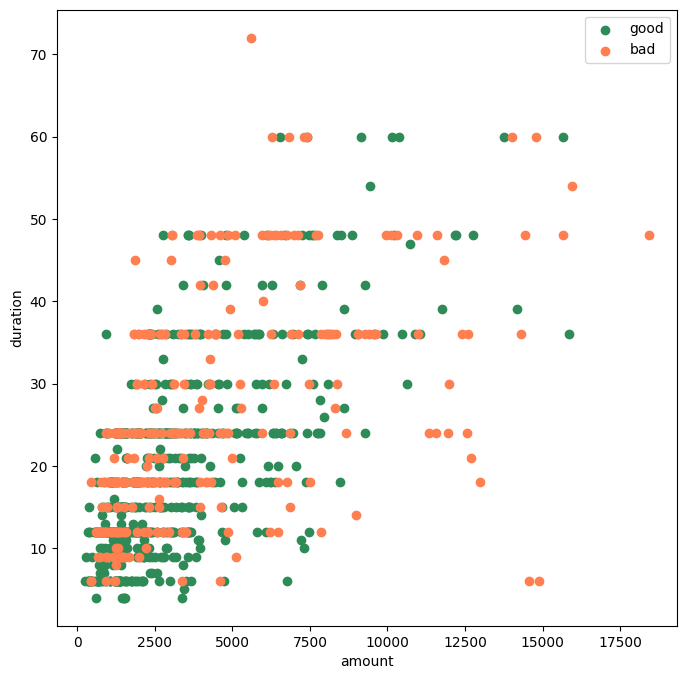

In [20]:
df1 = Data[Data['credit_risk'] == 'good']
df2 = Data[Data['credit_risk'] == 'bad']
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x = 'amount', y='duration', data = df1, color = 'seagreen')
ax.scatter(x = 'amount', y='duration', data = df2, color = 'coral')
ax.legend(('good','bad'))
ax.set_xlabel('amount')
ax.set_ylabel('duration')


Построим 3D версию диаграммы рассеяния, добавив ось с возрастом.

Text(0.5, 0, 'age')

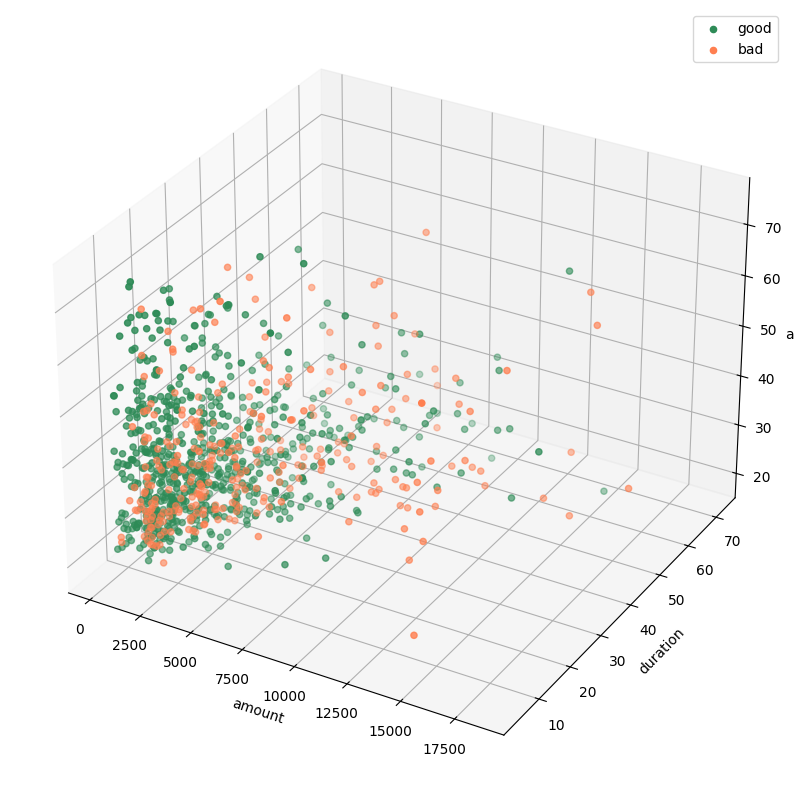

In [21]:
# your code here
df1 = Data[Data['credit_risk'] == 'good']
df2 = Data[Data['credit_risk'] == 'bad']
fig = plt.figure(figsize = (10,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs = 'amount', ys ='duration', zs = 'age', data = df1, color = 'seagreen')
ax.scatter(xs = 'amount', ys='duration', zs = 'age', data = df2, color = 'coral')
ax.legend(('good','bad'))
ax.set_xlabel('amount')
ax.set_ylabel('duration')
ax.set_zlabel('age')

### Кодирование категориальных признаков

Представим все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавимся от категориальных признаков.

In [22]:
Data['telephone_bin'] = Data['telephone'].map({'no': 0, 'yes (under customer name)': 1})
Data['foreign_bin'] = Data['foreign_worker'].map({'no': 0, 'yes': 1})
Data['risk_bin'] = Data['credit_risk'].map({'good':1, 'bad':0})
Data = Data.drop(['telephone', 'foreign_worker', 'credit_risk'], axis = 1)

In [23]:
Data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone_bin,foreign_bin,risk_bin
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,0,0,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,0,0,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,0,0,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,0,1,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,0,1,1


In [24]:
DataOrdinal_col = DataOrdinal.drop('credit_history', axis = 1).columns
for col in DataOrdinal_col:
    Data[col + '_enc'] = pd.factorize(DataOrdinal[col])[0]
    Data = Data.drop(col, axis = 1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   duration                     1000 non-null   int64 
 1   credit_history               1000 non-null   object
 2   amount                       1000 non-null   int64 
 3   installment_rate             1000 non-null   object
 4   present_residence            1000 non-null   object
 5   age                          1000 non-null   int64 
 6   number_credits               1000 non-null   object
 7   people_liable                1000 non-null   object
 8   telephone_bin                1000 non-null   int64 
 9   foreign_bin                  1000 non-null   int64 
 10  risk_bin                     1000 non-null   int64 
 11  status_enc                   1000 non-null   int64 
 12  purpose_enc                  1000 non-null   int64 
 13  savings_enc                  1000 

In [25]:
Data['credit_history_enc'] = pd.factorize(Data['credit_history'])[0]
Data = Data.drop('credit_history', axis = 1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   duration                     1000 non-null   int64 
 1   amount                       1000 non-null   int64 
 2   installment_rate             1000 non-null   object
 3   present_residence            1000 non-null   object
 4   age                          1000 non-null   int64 
 5   number_credits               1000 non-null   object
 6   people_liable                1000 non-null   object
 7   telephone_bin                1000 non-null   int64 
 8   foreign_bin                  1000 non-null   int64 
 9   risk_bin                     1000 non-null   int64 
 10  status_enc                   1000 non-null   int64 
 11  purpose_enc                  1000 non-null   int64 
 12  savings_enc                  1000 non-null   int64 
 13  employment_duration_enc      1000 

In [26]:
data = pd.get_dummies(Data, columns = ['installment_rate', 'present_residence', 'number_credits', 'people_liable'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   duration                            1000 non-null   int64
 1   amount                              1000 non-null   int64
 2   age                                 1000 non-null   int64
 3   telephone_bin                       1000 non-null   int64
 4   foreign_bin                         1000 non-null   int64
 5   risk_bin                            1000 non-null   int64
 6   status_enc                          1000 non-null   int64
 7   purpose_enc                         1000 non-null   int64
 8   savings_enc                         1000 non-null   int64
 9   employment_duration_enc             1000 non-null   int64
 10  personal_status_sex_enc             1000 non-null   int64
 11  other_debtors_enc                   1000 non-null   int64
 12  propert

In [32]:
data

,duration,amount,age,telephone_bin,foreign_bin,risk_bin,status_enc,purpose_enc,savings_enc,employment_duration_enc,...,installment_rate_25 <= ... < 35,installment_rate_< 20,installment_rate_>= 35,present_residence_4 <= ... < 7 yrs,present_residence_< 1 yr,present_residence_>= 7 yrs,number_credits_2-3,number_credits_4-5,number_credits_>= 6,people_liable_3 or more
0,18,1049,21,0,0,1,0,0,0,0,...,False,True,False,False,False,True,False,False,False,False
1,9,2799,36,0,0,1,0,1,0,1,...,True,False,False,False,False,False,True,False,False,True
2,12,841,23,0,0,1,1,2,1,2,...,True,False,False,False,False,True,False,False,False,False
3,12,2122,39,0,1,1,0,1,0,1,...,False,False,False,False,False,False,True,False,False,True
4,12,2171,38,0,1,1,0,1,0,1,...,False,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,0,0,0,0,3,0,1,...,True,False,False,False,False,True,False,False,False,True
996,24,2303,45,0,0,0,0,1,0,4,...,False,True,False,False,True,False,False,False,False,False
997,21,12680,30,1,0,0,2,1,3,4,...,False,True,False,False,False,True,False,False,False,False
998,12,6468,52,1,0,0,1,3,3,3,...,True,False,False,False,True,False,False,False,False,False


### Оценка признаков

По результатам получаем таблицу, в которой все признаки так или иначе представлены числовыми значениями. Придумаем на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. Постараемся
достичь точности хотя бы 0.6.

In [61]:
def predict(x):
    if x['credit_history_enc'] == 1 or x['credit_history_enc'] ==  0 :
        return 1
    return 0
    

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('risk_bin', axis = 1).values
y = data['risk_bin'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

#accuracy_score(y_test, predict(X_test))

In [50]:
print(data.iloc[0], '\n')
print(data.iloc[680], '\n')
print(data.iloc[10], '\n')

d_0 = data[data['risk_bin'] == 0]
print(d_0.iloc[0], '\n')
print(d_0.iloc[234], '\n')
print(d_0.iloc[112], '\n')

duration                                 18
amount                                 1049
age                                      21
telephone_bin                             0
foreign_bin                               0
risk_bin                                  1
status_enc                                0
purpose_enc                               0
savings_enc                               0
employment_duration_enc                   0
personal_status_sex_enc                   0
other_debtors_enc                         0
property_enc                              0
other_installment_plans_enc               0
housing_enc                               0
job_enc                                   0
credit_history_enc                        0
installment_rate_25 <= ... < 35       False
installment_rate_< 20                  True
installment_rate_>= 35                False
present_residence_4 <= ... < 7 yrs    False
present_residence_< 1 yr              False
present_residence_>= 7 yrs      

In [56]:
pred = data.apply(lambda x: predict(x), axis = 1) #по статусу
accuracy_score(data['risk_bin'], pred)

0.359

In [62]:
pred = data.apply(lambda x: predict(x), axis = 1) #по истории
accuracy_score(data['risk_bin'], pred)

0.685

In [59]:
print(data['credit_history_enc'].value_counts())
Data['credit_history'].value_counts()

credit_history_enc
1    530
0    293
2     88
4     49
3     40
Name: count, dtype: int64


credit_history
no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: count, dtype: int64

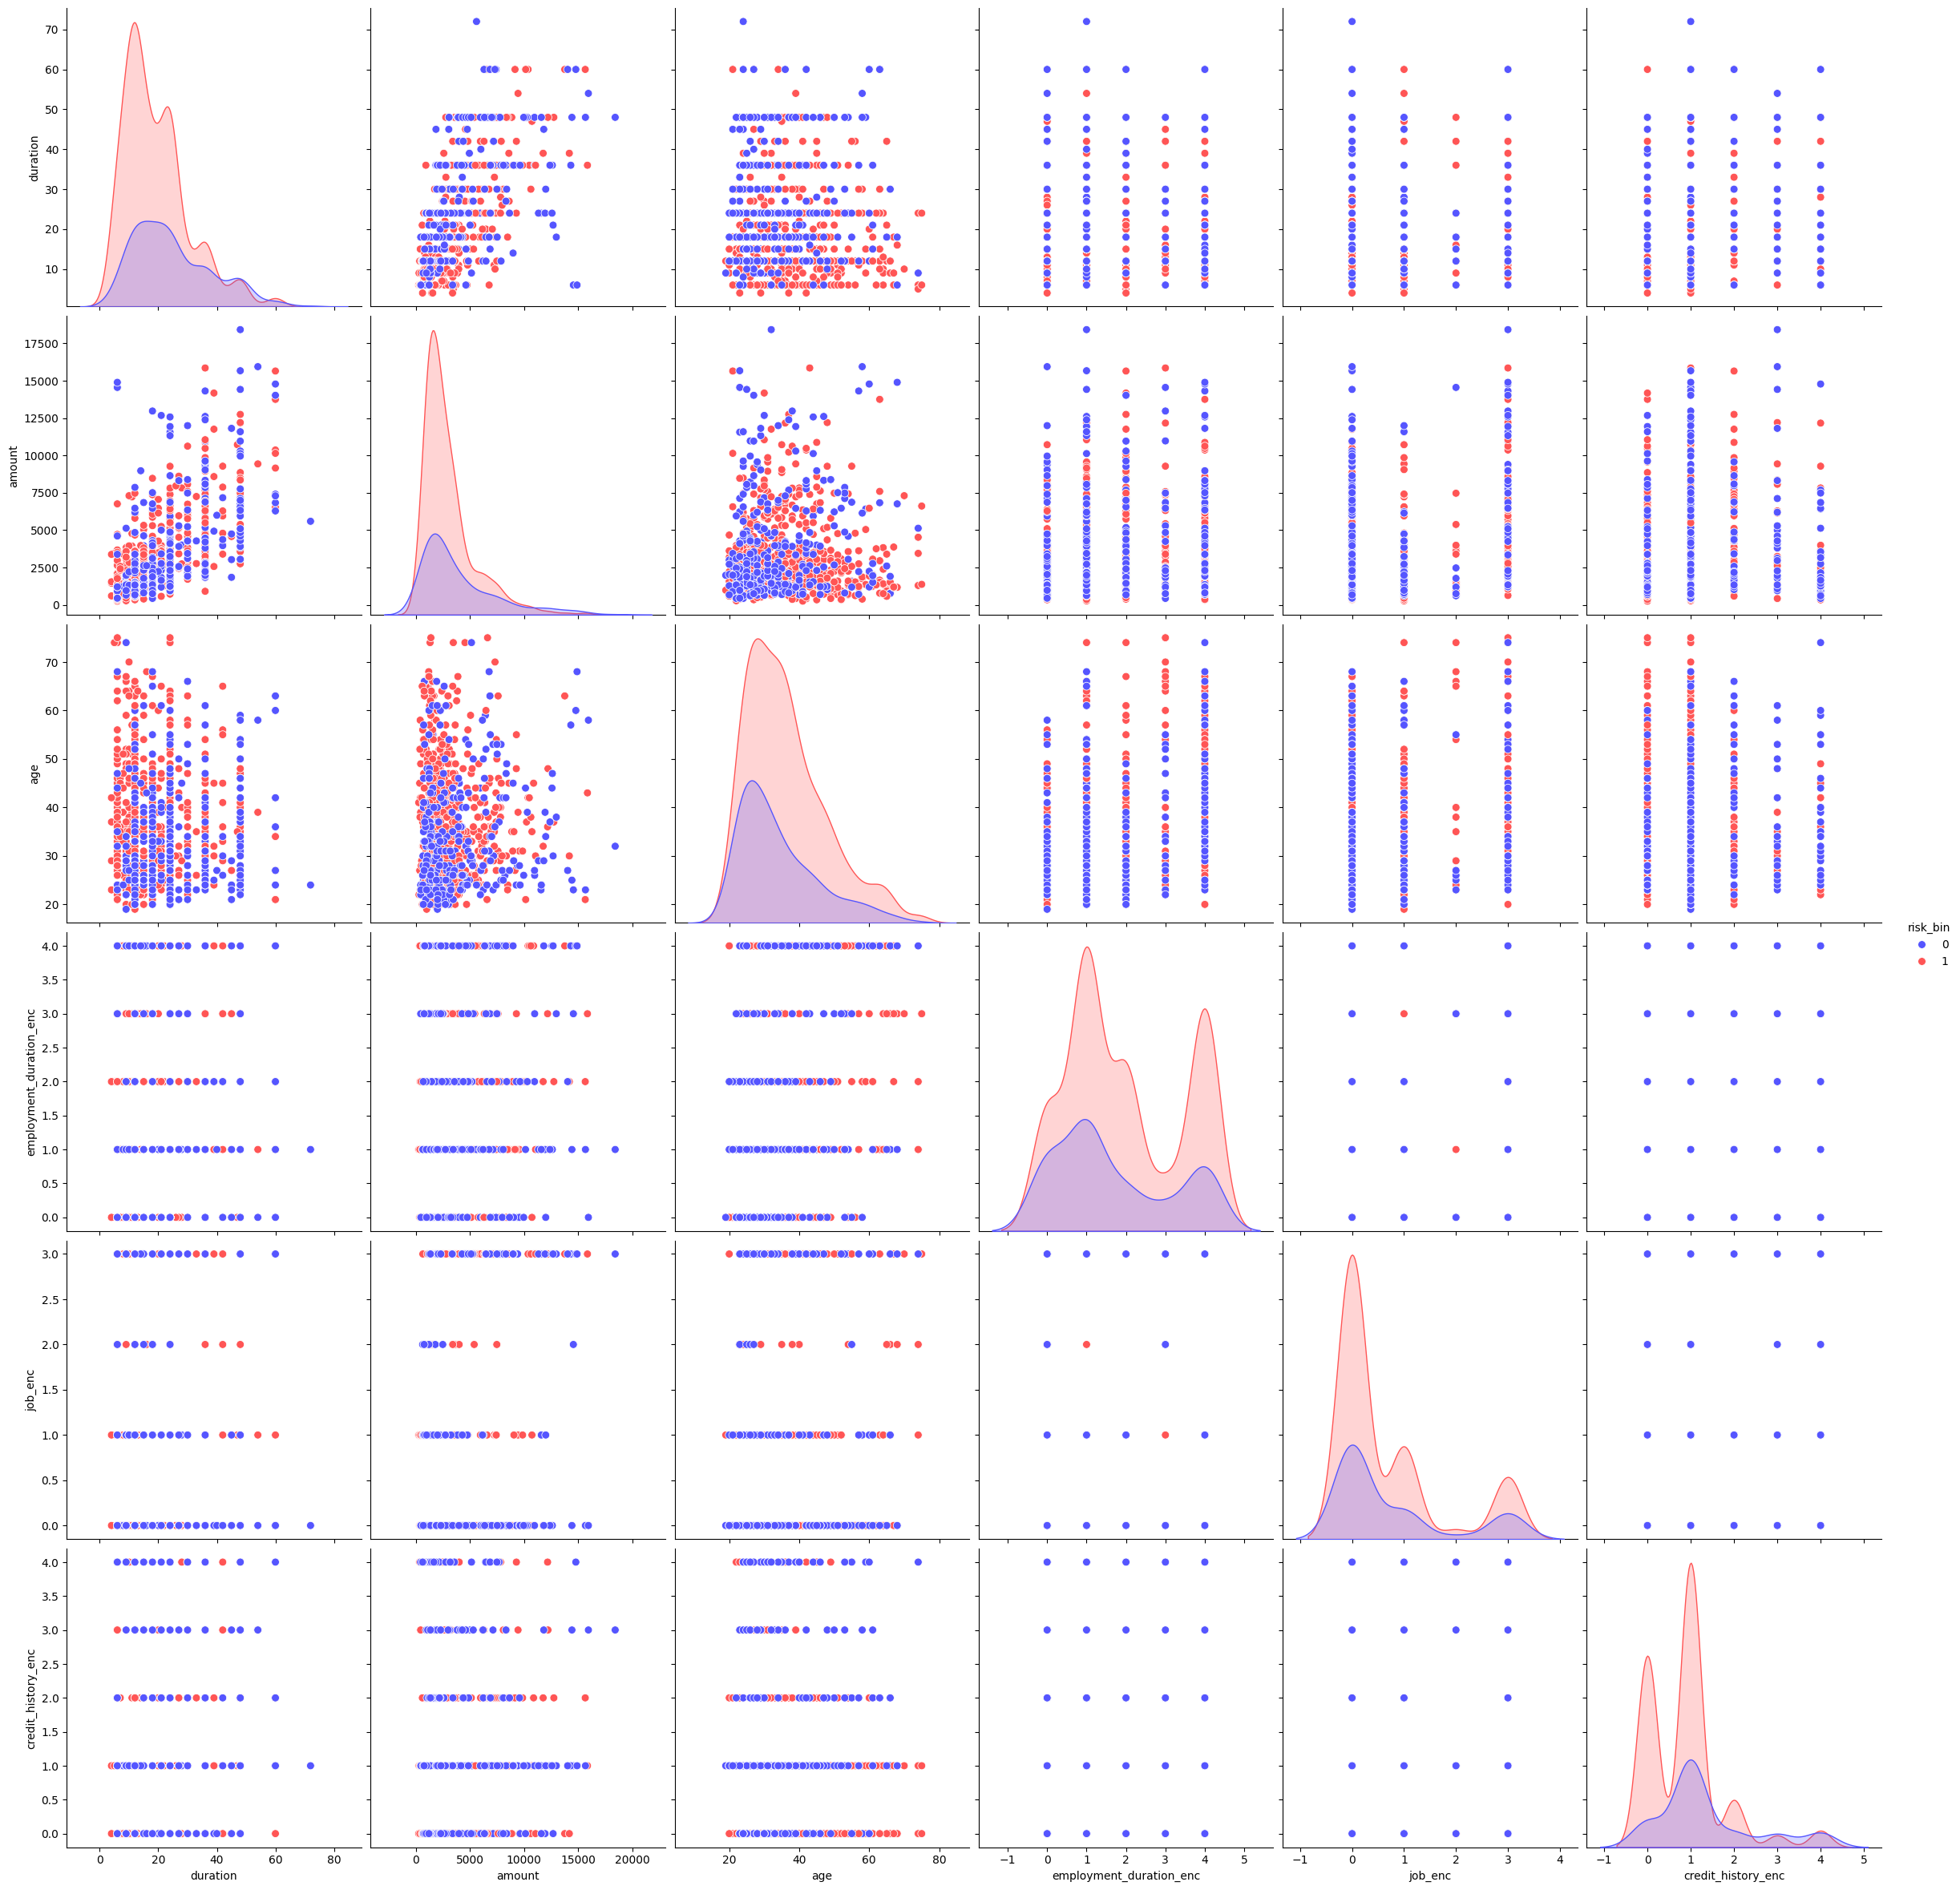

In [68]:
import warnings
warnings.simplefilter('ignore')
g = sns.pairplot( 
    data[['risk_bin', 'duration', 'amount','age','employment_duration_enc', 'job_enc', 'credit_history_enc']],
    hue = 'risk_bin',
    palette = 'seismic',
    height = 4,
    kind = 'scatter', #не очень хороши на категориальных признаках
    diag_kind='kde',
    diag_kws = dict(shade=True),
    plot_kws=dict(s=50)    
)

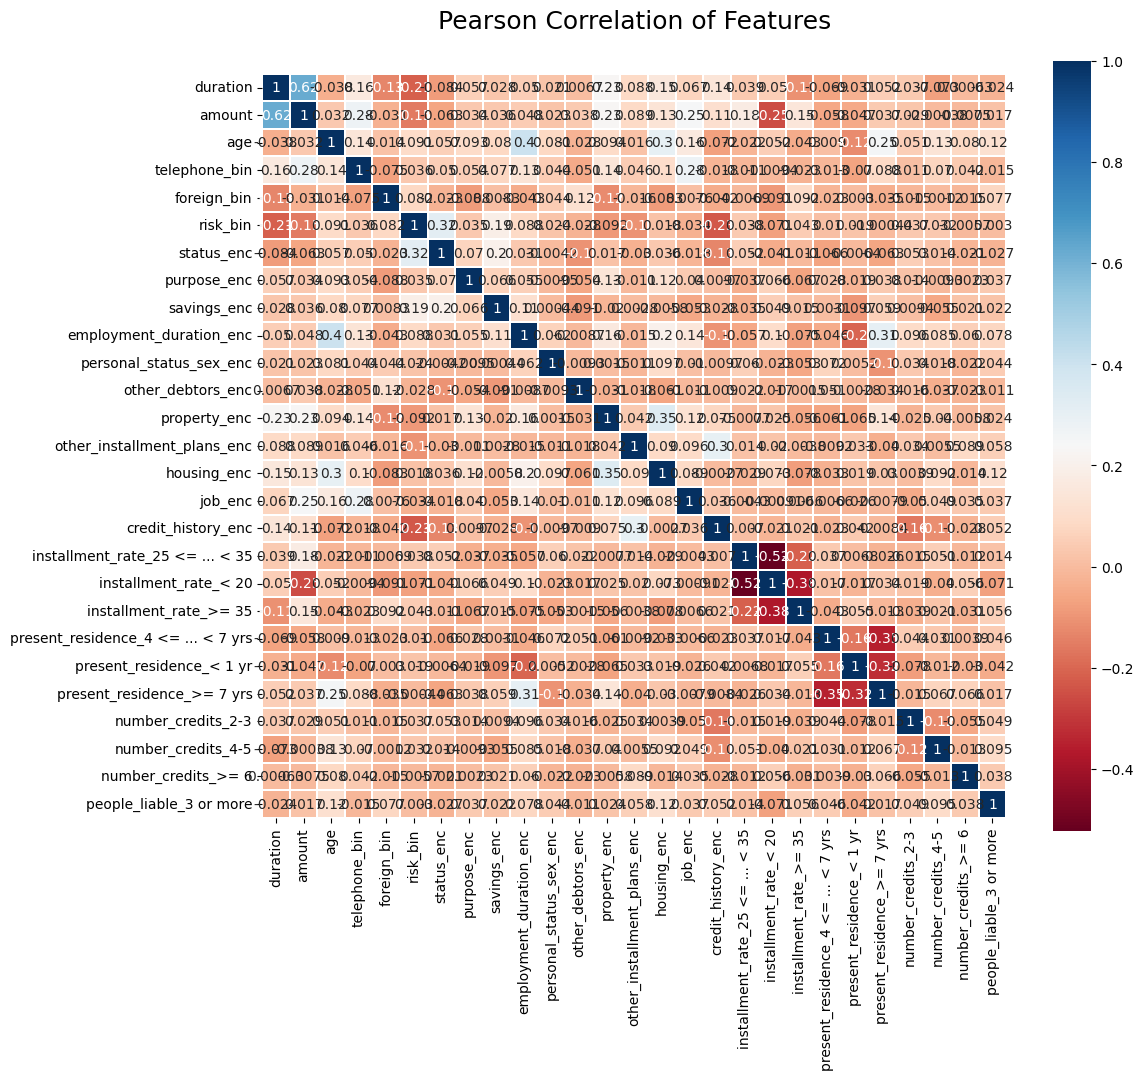

In [69]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,10))

plt.title('Pearson Correlation of Features', y=1.05, size = 18)
#heatmap -- тепловая карта
#отрисовывает степень кореллируемости признаков
#формула измеряет как одновременно два признака отклоняются от своего среднего -- корелляция Пирсона
sns.heatmap( data.corr(),
           linewidths=0.1, vmax=1.0,
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()